# Testing a Simple URL Parser Program

In [10]:
#import all the libraries
from urllib.parse import urlparse
from fuzzingbook.MutationFuzzer import MutationFuzzer
from fuzzingbook.Coverage import Coverage
import random
import pandas as pd # data processing, dataframe
import seaborn as sns # attractive vizualization of data representation


In [ ]:
def http_program(url):
    supported_schemes = ["http", "https"]
    result = urlparse(url)
    if result.scheme not in supported_schemes:
        raise ValueError("Scheme must be one of " + repr(supported_schemes))
    if result.netloc == '':
        raise ValueError("Host must be non-empty")

    # Do something with the URL
    return True  

In [11]:
def is_valid_url(url):
    try:
        result = http_program(url)
        return True
    except ValueError:
        return False

In [12]:
# the code mutates the input by randomly adding a character from "A"-"z" (65-127) ascii char
def add_random_char(inp):
    pos = random.randint(0, len(inp) - 1)
    random_character = chr(random.randrange(65, 127))
    return inp[:pos] + random_character + inp[pos:]

In [13]:
random.randint(0, 10)

0

In [14]:
def flip_random_character(inp):
    if inp == "":
        return inp
    pos = random.randint(0, len(inp) - 1)
    c = inp[pos]
    bit = 1 << random.randint(0, 6)
    new_c = chr(ord(c) ^ bit)
    return inp[:pos] + new_c + inp[pos + 1:]

In [15]:
# the code mutates the input by randomly deleting a character
def delete_random_char(inp):
    if inp == "":
        return inp
    pos = random.randint(0, len(inp) - 1)
    return inp[:pos] + inp[pos+1:]

In [95]:

dfSeedCoverage = pd.DataFrame(columns=['Seed', 'TrialNo', 'Coverage'])
cumulative_coverage = []
def calculate_cumulative_coverage(input_population, is_valid_url):
    global dfSeedCoverage
    dfSeedCoverage = pd.DataFrame()
    global cumulative_coverage 
    cumulative_coverage = []
    all_coverage = set()
    beforeUnion = 0
    afterUnion = 0
    trialNo = 0
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                is_valid_url(inp) # this is the program we are testing using the mutationFuzzer()
            except:
                raise ValueError("We found exception from this input: ", +inp)
        
        trialNo +=1
        # set union to get the increased coverage number for next seed
        beforeUnion = len(all_coverage)
        all_coverage = all_coverage.union(cov.coverage())
        afterUnion = len(all_coverage)  
        #print(afterUnion, beforeUnion)  
        if(afterUnion > beforeUnion):
            #print("after:" +inp)
            cumulative_coverage.append(len(all_coverage))
            dfSeedCoverage = dfSeedCoverage.append({'Seed': inp, 'TrialNo': trialNo, 'Coverage': afterUnion}, 
                                                   ignore_index=True) 
            
    return cumulative_coverage



In [101]:
trials = 1000
newSeed = "https://www.google.com/?def=18&abc=abc"
mutation_fuzzer = MutationFuzzer(seed = [newSeed])
population = []

for i in range(0, trials):
    population.append(mutation_fuzzer.fuzz())
    cumulative_coverage = calculate_cumulative_coverage(population, is_valid_url)
dfSeedCoverage

,Coverage,Seed,TrialNo
0,58.0,https://www.google.com/?def=18&abc=abc,1.0
1,61.0,htcftps://www68.g3ogle.cmm/def=18&abc?abc,2.0
2,62.0,ht/Fs://wJww.googWn!e.com/?def=18&abc=Yabc,4.0
3,65.0,hptds://wwwu.gOooge*cM/?ef=18&abc=abc,12.0
4,66.0,https:/:/www.google.coim/?dYef=18&abc=ab,14.0
5,67.0,htps://[www.googlencom/?def=H18abc=abc,23.0
6,72.0,https:^//w;ww.google.com/?$ef=18&abc=a+bc,24.0
7,73.0,https://www.googlOe.com/?def=1:&b#=abc,27.0
8,85.0,http://www.goog|e.cwom/?def=1V8&abc=abc,31.0
9,86.0,httbs//ww.google.com/;def18&bdc=abc,94.0


Text(0, 0.5, 'lines covered')

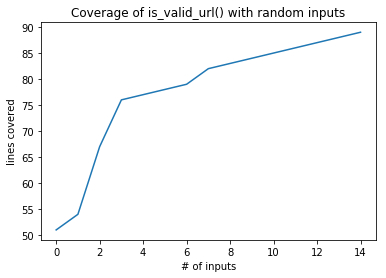

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_url() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

In [62]:
trials = 1000
newSeed = "http://www.my.concordia.ca"
mutation_fuzzer = MutationFuzzer(seed = [newSeed])
population = []

for i in range(0, trials):
    population.append(mutation_fuzzer.fuzz())
cumulative_coverage = calculate_cumulative_coverage(population, is_valid_url)
dfSeedCoverage


,Coverage,Seed,TrialNo
0,51.0,http://www.concordia.ca,1.0
1,54.0,http:/wwncncorda:a,2.0
2,67.0,jhttx;//ws.comcodia.ca,4.0
3,76.0,tp://ww.cncordia.ca,5.0
4,77.0,htt`p:{//w.concorl%ia.c|a,6.0
5,78.0,http:?/www.cono\rdianca,8.0
6,79.0,htt`>//ww.c#oncoVrdia.ca,10.0
7,82.0,htp//www&cocord#iaj.ca,17.0
8,83.0,htdp://www.c*oncor/dia.ca,19.0
9,84.0,lttp:/?www. cocordia.ca,41.0


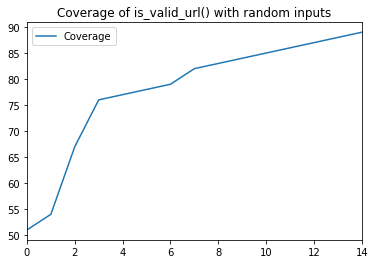

In [63]:
dfSeedCoverage.plot( y='Coverage', kind = 'line', 
                    title ='Coverage of is_valid_url() with random inputs')


In [20]:
newSeed = "http://www.concordia.ca"
newSeed.split("//",2)[1]

'www.concordia.ca'

In [93]:
abc = dfSeedCoverage.tail(1)
print(dfSeedCoverage.iloc[ 1 : 2 ,  1 : 1 ])

Empty DataFrame
Columns: []
Index: [1]
